In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [36]:
data = pd.read_csv('Unemployment in India.csv')

In [37]:
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
data.shape

(768, 7)

In [39]:
data.sample(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,Goa,30-09-2019,Monthly,3.61,163215.0,35.78,Rural
680,Tamil Nadu,31-03-2020,Monthly,6.46,10982178.0,36.17,Urban
273,Sikkim,31-12-2019,Monthly,1.00,161647.0,46.30,Rural
756,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [41]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [42]:
data.duplicated().sum()

27

In [43]:
data.drop_duplicates(inplace=True)

In [44]:
data.duplicated().sum()

0

In [45]:
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


In [46]:
data.shape

(741, 7)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 741 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.3+ KB


In [48]:
data.isnull().sum()

Region                                      1
 Date                                       1
 Frequency                                  1
 Estimated Unemployment Rate (%)            1
 Estimated Employed                         1
 Estimated Labour Participation Rate (%)    1
Area                                        1
dtype: int64

In [49]:
mask = data.isnull()

data[mask.any(axis=1)]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
359,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
data = data.drop(359)

In [51]:
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [52]:
data = data.reset_index(drop=True)

In [53]:
data.sample(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
587,Meghalaya,31-05-2020,Monthly,14.58,222916.0,48.48,Urban
248,Punjab,31-10-2019,Monthly,12.56,6021921.0,45.66,Rural
545,Kerala,31-05-2020,Monthly,30.28,2826118.0,29.95,Urban
669,Tamil Nadu,30-06-2020,Monthly,24.93,7741005.0,31.60,Urban
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural


# EDA

In [56]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [62]:
data['Region'].value_counts()

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

In [73]:
data['Area'].value_counts()

Area
Urban    381
Rural    359
Name: count, dtype: int64

In [69]:
data[' Date'].value_counts()

 Date
 31-10-2019    55
 30-11-2019    55
 31-05-2019    54
 30-06-2019    54
 31-07-2019    54
 31-08-2019    53
 31-12-2019    53
 31-01-2020    53
 29-02-2020    53
 30-09-2019    52
 31-03-2020    52
 30-04-2020    51
 31-05-2020    51
 30-06-2020    50
Name: count, dtype: int64

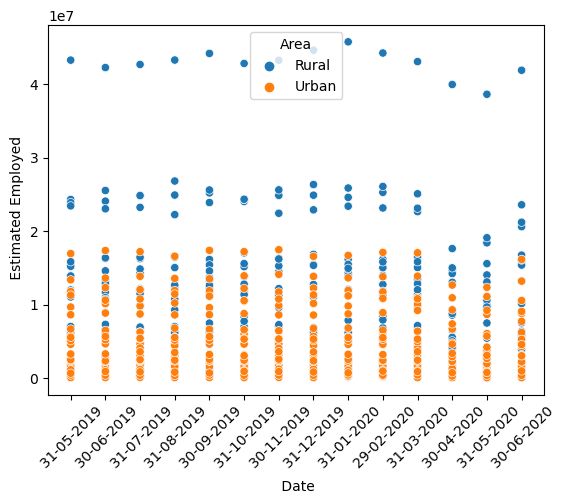

In [112]:
sns.scatterplot( x=data[' Date'],y=data[' Estimated Employed'], hue=data['Area'])
plt.xticks(rotation=45)  
plt.show() 

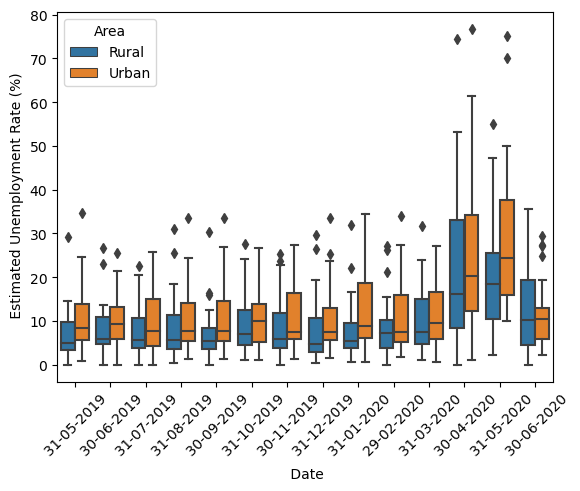

In [110]:
sns.boxplot( x=data[' Date'],y=data[' Estimated Unemployment Rate (%)'], hue=data['Area'])
plt.xticks(rotation=45)  
plt.show() 

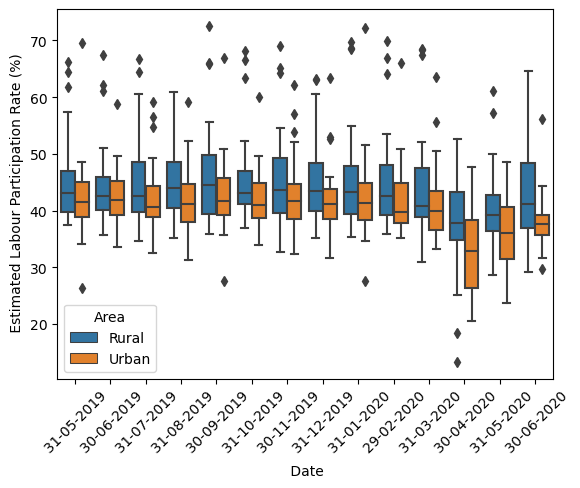

In [109]:
sns.boxplot( x=data[' Date'],y=data[' Estimated Labour Participation Rate (%)'], hue=data['Area'])
plt.xticks(rotation=45)  
plt.show() 

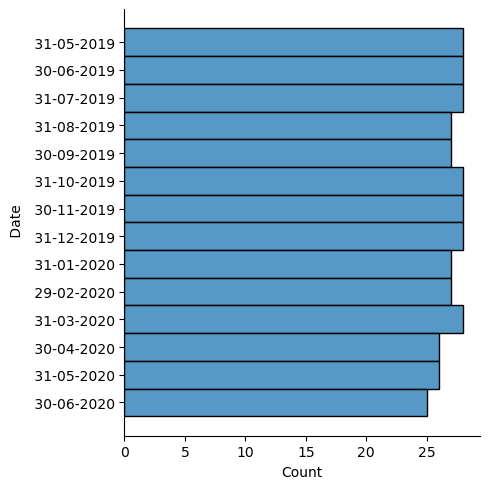

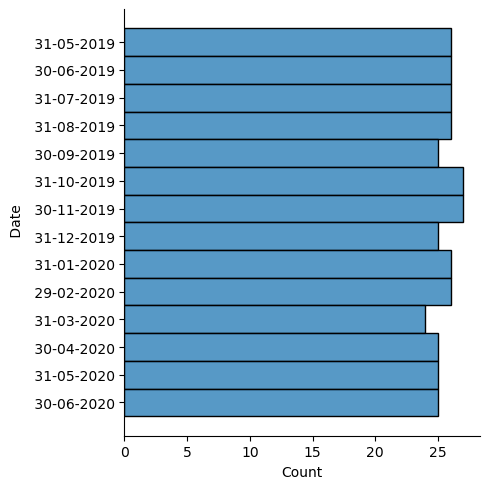

In [92]:
sns.displot(y=data[data['Area']=='Urban'][' Date'])
sns.displot(y=data[data['Area']=='Rural'][' Date'])

In [106]:
from ipywidgets import interact, widgets

def calculate_region_stats(region):
    region_data = data[data['Region'] == region]
    region_stats = region_data[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']].describe()
    return region_stats

def update_plot_and_stats(selected_region):
    plt.figure(figsize=(10, 6))
    plt.xticks(rotation=60)
    sns.scatterplot(data=data[data['Region'] == selected_region], x=' Date', y=' Estimated Employed', hue='Area')
    plt.title(f'Scatter Plot for {selected_region}')
    plt.show()
    
    region_stats = calculate_region_stats(selected_region)
    display(region_stats)

unique_regions = data['Region'].unique()

region_dropdown = widgets.Dropdown(options=unique_regions, description='Select Region:')

interact(update_plot_and_stats, selected_region=region_dropdown)


interactive(children=(Dropdown(description='Select Region:', options=('Andhra Pradesh', 'Assam', 'Bihar', 'Chh…

<function __main__.update_plot_and_stats(selected_region)>

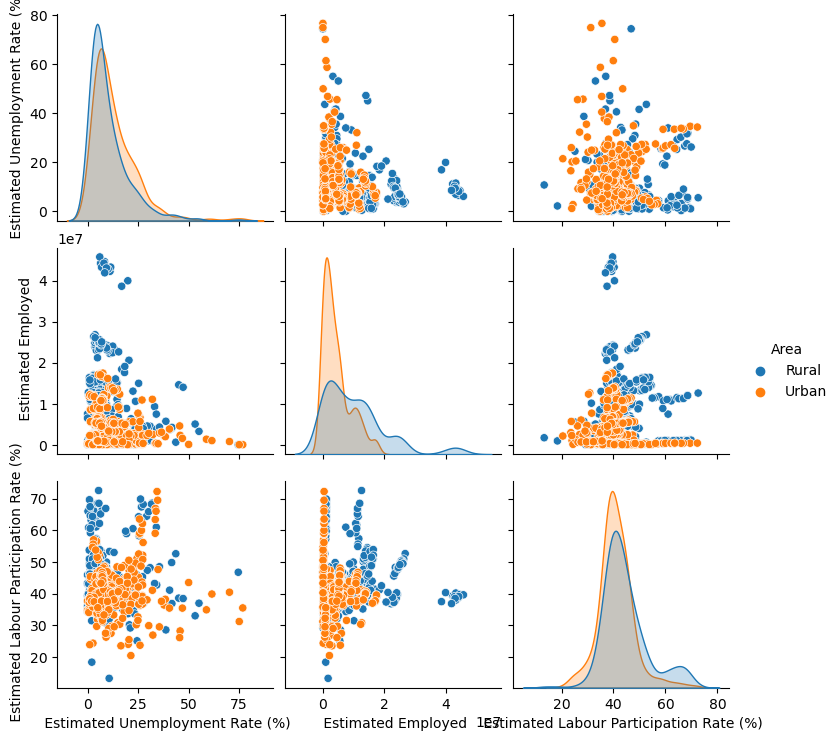

In [102]:
sns.pairplot(data,hue='Area')

In [129]:
from ipywidgets import interact, widgets

def update_plot(selected_region):
    plt.figure(figsize=(10, 6))
    plt.xticks(rotation=60)
    filtered_data = data[(data['Region'] == selected_region)]
    
    sns.scatterplot(data=filtered_data, x=' Date', y=' Estimated Unemployment Rate (%)', hue='Area', palette='Set1', label='Unemployment Rate')
    sns.scatterplot(data=filtered_data, x=' Date', y=' Estimated Labour Participation Rate (%)', hue='Area', palette='Set2', label='Labour Participation Rate')

    plt.title(f'Scatter Plot for {selected_region}')
    plt.legend(title='Rates')
    plt.show()

unique_regions = data['Region'].unique()

region_dropdown = widgets.Dropdown(options=unique_regions, description='Select Region:')

interact(update_plot, selected_region=region_dropdown)


interactive(children=(Dropdown(description='Select Region:', options=('Andhra Pradesh', 'Assam', 'Bihar', 'Chh…

<function __main__.update_plot(selected_region)>

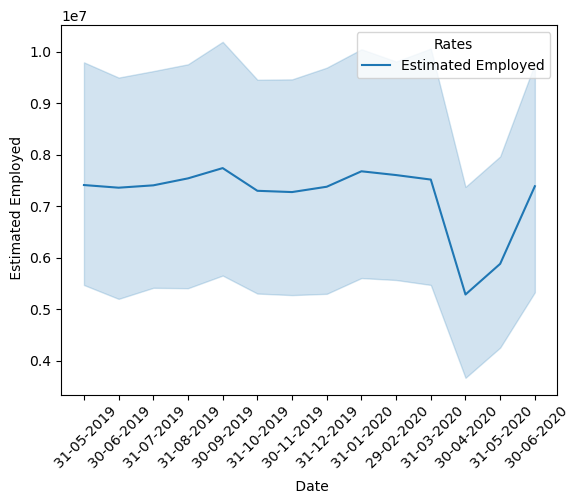

In [137]:
sns.lineplot(x=data[' Date'], y=data[' Estimated Employed'], label='Estimated Employed')
plt.xticks(rotation=45)  
plt.legend(title='Rates')
plt.show()

In [143]:
state_avg_employment = data.groupby('Region')[' Estimated Employed'].mean()
state_avg_unemploymentrate = data.groupby('Region')[' Estimated Unemployment Rate (%)'].mean()
state_avg_labourrate = data.groupby('Region')[' Estimated Labour Participation Rate (%)'].mean()

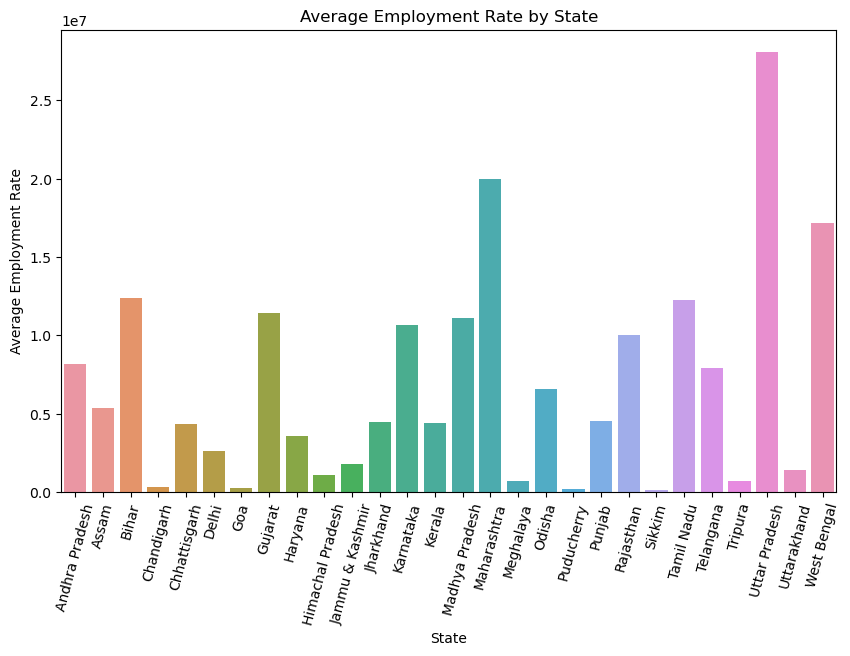

In [144]:
plt.figure(figsize=(10, 6))
sns.barplot(x=state_avg_employment.index, y=state_avg_employment.values)
plt.xlabel('State')
plt.ylabel('Average Employment Rate')
plt.title('Average Employment Rate by State')
plt.xticks(rotation=75)
plt.show()

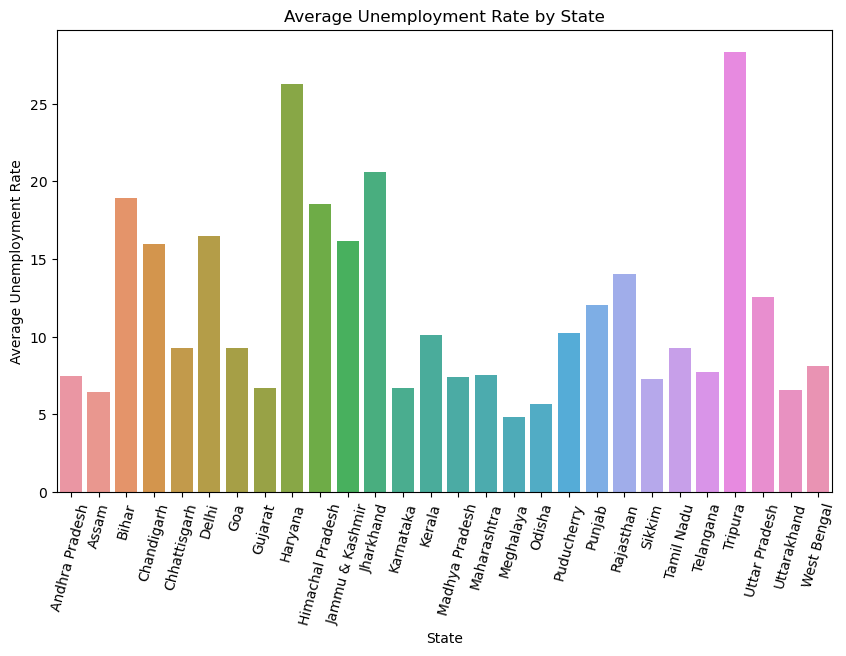

In [147]:
plt.figure(figsize=(10, 6))
sns.barplot(x=state_avg_unemploymentrate.index, y=state_avg_unemploymentrate.values)
plt.xlabel('State')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by State')
plt.xticks(rotation=75)
plt.show()

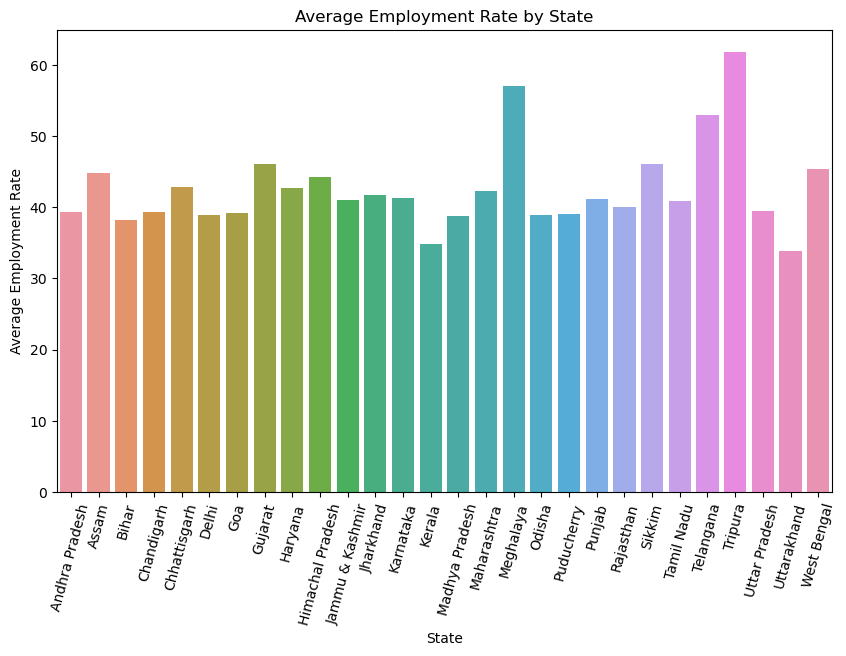

In [148]:
plt.figure(figsize=(10, 6))
sns.barplot(x=state_avg_labourrate.index, y=state_avg_labourrate.values)
plt.xlabel('State')
plt.ylabel('Average Employment Rate')
plt.title('Average Employment Rate by State')
plt.xticks(rotation=75)
plt.show()